#### This is a evaluation test for a Data Analyst position at a Game company in Montreal.

Two databases (csv format) were provided to calculate  the following KPI* and present them with comprehensible figures:

- Daily Active User* segmented by platform
- Daily Active Customer* segmented by platform
- Daily Revenue* segmented by platform
- Daily Conversion* segmented by platform
- Day-7 Retention segmented by platform (optional)


In [79]:
#data manipulation
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#set few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

### Load and examine the data

In [80]:
#read in data
play=pd.read_csv('play_evaluation.csv', sep=';',parse_dates=['Date'])
sales = pd.read_csv('sales_evaluation.csv', sep=';', parse_dates=['Date'])
sales.head()

,store_item_name,client_id,Date,dollar_spent
0,pack_a,pac2dp471ap,2015-12-02,0.99
1,pack_a,p6718p11e7p,2015-12-08,0.99
2,bundle_9,pczbap4facp,2015-11-23,18.50
3,pack_a,p606cp4fe8p,2015-11-25,0.99
4,pack_b,pc06ep11e6p,2015-11-18,1.20


In [81]:
play.head()

,Date,Platform,build_version,client_id,outcome,experience_points
0,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308
1,2015-11-14,PS4,1.0.1,p231ep4ebbp,win,510.737943
2,2015-11-26,PS4,1.0.1,p1321p488fp,win,333.307999
3,2015-12-03,PC,1.0.1,pzda4p4z98p,win,542.839919
4,2015-11-22,PC,1.0.1,pe8e7p40a9p,win,381.683084


In [82]:
#statistical description of the dataset
play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
Date                 30000 non-null object
Platform             30000 non-null object
build_version        30000 non-null object
client_id            30000 non-null object
outcome              30000 non-null object
experience_points    30000 non-null float64
dtypes: float64(1), object(5)
memory usage: 1.4+ MB


 There is a row in data cell that exceeds the number of days in a month; I will drop that value

In [83]:
play=play.replace('2015-11-31', np.nan).dropna()

In [84]:
#Transform Data column from object type to datatime, in order to do transformation and stitstics with it
play['Date'] = pd.to_datetime(play['Date'],format='%Y/%m/%d')


In [85]:
play.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29084 entries, 0 to 29999
Data columns (total 6 columns):
Date                 29084 non-null datetime64[ns]
Platform             29084 non-null object
build_version        29084 non-null object
client_id            29084 non-null object
outcome              29084 non-null object
experience_points    29084 non-null float64
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.6+ MB


In [86]:
sales = sales.replace('2015-11-31', np.nan).dropna()

In [87]:
#Transform Data column from object type to datatime, in order to do transformation and stitstics with it
sales['Date'] = pd.to_datetime(sales['Date'])

### Checking for missing values

In [88]:
#function to calculate missing values by column

def missing_values_table(df):
    #total missing values
    mis_val=df.isnull().sum()
    
    #percentage of missing values
    mis_val_percent=100*df.isnull().sum()/len(df)
    
    #make a table with the results
    mis_val_table=pd.concat([mis_val, mis_val_percent],axis=1)
    
    #rename columns
    mis_val_table_re=mis_val_table.rename(columns={0:'missing values', 1:'% of total values'})
    
    #sort the table by percentage of missing descending
    mis_val_table_re=mis_val_table_re[mis_val_table_re.iloc[:,1]!=0].sort_values('% of total values', ascending=False).round(1)
    # Return the dataframe with missing information
    
    #Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_re.shape[0]) +
              " columns that have missing values.")
    return mis_val_table_re

In [89]:
# Missing values statistics
missing_values = missing_values_table(play)
missing_values.head()

Your selected dataframe has 6 columns.
There are 0 columns that have missing values.


,missing values,% of total values


In [90]:
# Missing values statistics
missing_values = missing_values_table(sales)
missing_values.head()

Your selected dataframe has 4 columns.
There are 0 columns that have missing values.


,missing values,% of total values


### Daily Active User* segmented by platform

In [91]:
DAU=play.groupby(['Date', 'Platform'], as_index=False).agg({'client_id': lambda x: x.nunique()})
DAU.head()

,Date,Platform,client_id
0,2015-11-12,PC,236
1,2015-11-12,PS4,115
2,2015-11-13,PC,246
3,2015-11-13,PS4,133
4,2015-11-14,PC,250


In [92]:
DAU.set_index('Platform', inplace=True) 

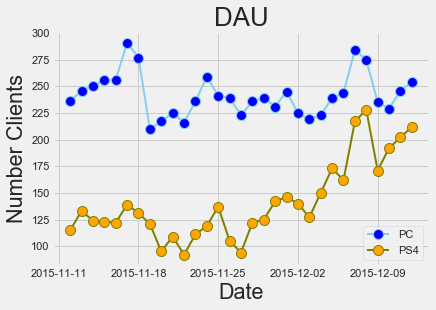

In [93]:
plt.plot( 'Date', 'client_id', data=DAU.loc['PC'], marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linewidth=2, label="PC")
plt.plot( 'Date', 'client_id', data=DAU.loc['PS4'], marker='o', markerfacecolor='orange',color='olive', markersize=10, linewidth=2, label="PS4" )
plt.legend()
plt.ylabel('Number Clients'), plt.xlabel('Date')
plt.title('DAU');

As per table and plot from above, the number of daily active users on PC Platform is very high compared with the number of the number of daily active users on PS4 Platform (more than 2 times) at he begining of the period, whereas the number for both platforms are getting close to an equal number by the end of the period.

### Daily Active Customer* segmented by platform

In [94]:
sales.rename(columns={'Date':'Purchase'}, inplace=True)

Both tables must be merged in order to segment the DAC by platform

In [95]:
pl=play.merge(sales, on='client_id', how='left')

In [96]:
pl.head()

,Date,Platform,build_version,client_id,outcome,experience_points,store_item_name,Purchase,dollar_spent
0,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,pack_c,2015-12-02,1.99
1,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,pack_a,2015-12-08,0.99
2,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,pack_c,2015-11-19,1.99
3,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,bundle_1,2015-12-05,15.99
4,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,pack_a,2015-12-11,0.99


In [97]:
pl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80543 entries, 0 to 80542
Data columns (total 9 columns):
Date                 80543 non-null datetime64[ns]
Platform             80543 non-null object
build_version        80543 non-null object
client_id            80543 non-null object
outcome              80543 non-null object
experience_points    80543 non-null float64
store_item_name      68504 non-null object
Purchase             68504 non-null datetime64[ns]
dollar_spent         68504 non-null float64
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 6.1+ MB


#### Checking for missing values again, since we merged the two tables which have different total number of entries

In [98]:
missing_values = missing_values_table(pl)
missing_values.head()

Your selected dataframe has 9 columns.
There are 3 columns that have missing values.


,missing values,% of total values
store_item_name,12039,14.9
Purchase,12039,14.9
dollar_spent,12039,14.9


Missing values are normal after aligning two tables with different number of entries.

In [99]:
#deleting the rows with missing values
play=pl.dropna(subset = ['store_item_name', 'Purchase', 'dollar_spent'])

In [100]:
DAC=play.groupby(['Purchase', 'Platform'],as_index=False).agg({'client_id': lambda x: x.nunique()}) 
DAC.head()

,Purchase,Platform,client_id
0,2015-11-12,PC,107
1,2015-11-12,PS4,59
2,2015-11-13,PC,108
3,2015-11-13,PS4,69
4,2015-11-14,PC,127


In [101]:
DAC.set_index('Platform', inplace=True)

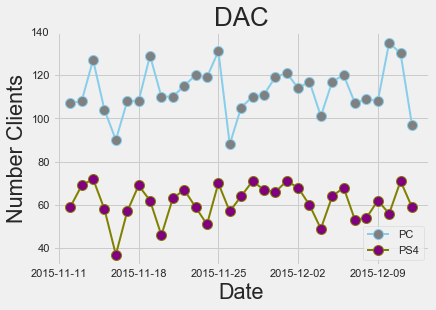

In [102]:
plt.plot( 'Purchase', 'client_id', data=DAC.loc['PC'], marker='o', markerfacecolor='grey', markersize=10, color='skyblue', linewidth=2, label="PC")
plt.plot( 'Purchase', 'client_id', data=DAC.loc['PS4'], marker='o', markerfacecolor='purple',color='olive', markersize=10, linewidth=2, label="PS4")
plt.ylabel('Number Clients'), plt.xlabel('Date')
plt.legend()
plt.title('DAC');

As per table and plot from above, the number of active customers on PC Platform is very high compared with the number of the number of active users on PS4 Platform (more than 2 times) the studied period, whereas the variation in number coincide for both cases.

### Daily Revenue* segmented by platform

In [103]:
DR=play.groupby(['Purchase', 'Platform'],as_index=False).agg({'dollar_spent': lambda x: x.sum()}) 
DR.head()

,Purchase,Platform,dollar_spent
0,2015-11-12,PC,7787.86
1,2015-11-12,PS4,6892.36
2,2015-11-13,PC,4182.08
3,2015-11-13,PS4,3930.50
4,2015-11-14,PC,5225.48


In [104]:
DR.set_index('Platform', inplace=True)

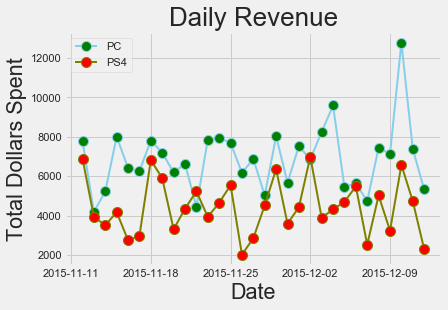

In [105]:
plt.plot( 'Purchase', 'dollar_spent', data=DR.loc['PC'], marker='o', markerfacecolor='green', markersize=10, color='skyblue', linewidth=2, label="PC")
plt.plot( 'Purchase', 'dollar_spent', data=DR.loc['PS4'], marker='o', markerfacecolor='red',color='olive', markersize=10, linewidth=2, label="PS4" )
plt.ylabel('Total Dollars Spent'), plt.xlabel('Date')
plt.legend()
plt.title('Daily Revenue');

As per table and plot from above, the value of daily revenue on PC Platform and the value of of daily revenue on PS4 Platform, over the studied period, has very high variations. Sometime, the pic variations show two times difference in value.

### Daily Conversion* segmented by platform

First, we find the players who became a customers

In [106]:
DC=play[play["Date"]==play["Purchase"]].groupby(['Date', 'Purchase', 'Platform'],as_index=False).agg({'client_id': lambda x: x.nunique()})

In [107]:
DC.head()

,Date,Purchase,Platform,client_id
0,2015-11-12,2015-11-12,PC,23
1,2015-11-12,2015-11-12,PS4,12
2,2015-11-13,2015-11-13,PC,16
3,2015-11-13,2015-11-13,PS4,14
4,2015-11-14,2015-11-14,PC,21


Next, we devide the number of players who became customers by the total numer of players per say  and oer platform.

In [108]:
START = pd.read_csv('play_evaluation.csv', sep=';')

In [109]:
active=START.groupby(['Date','Platform'],as_index=False).agg({'client_id': lambda x: x.nunique()}) 
active.head()

,Date,Platform,client_id
0,2015-11-12,PC,236
1,2015-11-12,PS4,115
2,2015-11-13,PC,246
3,2015-11-13,PS4,133
4,2015-11-14,PC,250


In [110]:
DC['conversion%']=DC['client_id']/active['client_id']*100

In [111]:
DC.head()

,Date,Purchase,Platform,client_id,conversion%
0,2015-11-12,2015-11-12,PC,23,9.745763
1,2015-11-12,2015-11-12,PS4,12,10.434783
2,2015-11-13,2015-11-13,PC,16,6.504065
3,2015-11-13,2015-11-13,PS4,14,10.526316
4,2015-11-14,2015-11-14,PC,21,8.400000


In [112]:
DC.set_index('Platform', inplace=True)

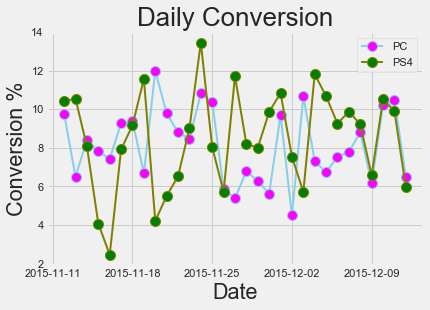

In [113]:
plt.plot( 'Purchase', 'conversion%', data=DC.loc['PC'], marker='o', markerfacecolor='magenta', markersize=10, color='skyblue', linewidth=2, label="PC")
plt.plot( 'Purchase', 'conversion%', data=DC.loc['PS4'], marker='o', markerfacecolor='green',color='olive', markersize=10, linewidth=2, label="PS4" )
plt.ylabel('Conversion %'), plt.xlabel('Date')
plt.legend()
plt.title('Daily Conversion');

As per table and plot from above, the value of daily conversion on PC Platform and the value of of daily conversion on PS4 Platform, over the studied period, has very high variations.At the very beginig of the period, the variation picks between the two values are almost triple, getting to a closer value by the end of the period.

### Day-7 Retention segmented by platform

In [114]:
DAU=play.groupby(['Date', 'Platform'], as_index=False).agg({'client_id': lambda x: x.nunique()})
DAU.head()

,Date,Platform,client_id
0,2015-11-12,PC,159
1,2015-11-12,PS4,72
2,2015-11-13,PC,159
3,2015-11-13,PS4,92
4,2015-11-14,PC,179


In [115]:
PC=DAU.apply(lambda row: row[DAU['Platform'].isin(['PC'])])
PC.head()

,Date,Platform,client_id
0,2015-11-12,PC,159
2,2015-11-13,PC,159
4,2015-11-14,PC,179
6,2015-11-15,PC,179
8,2015-11-16,PC,171


In [116]:
PC.set_index(['Date', 'Platform'], inplace=True)

In [117]:
PC.rolling(7).sum().head(10)

,,client_id
Date,Platform,
2015-11-12,PC,NaN
2015-11-13,PC,NaN
2015-11-14,PC,NaN
2015-11-15,PC,NaN
2015-11-16,PC,NaN
2015-11-17,PC,NaN
2015-11-18,PC,1234.0
2015-11-19,PC,1210.0
2015-11-20,PC,1196.0


In [118]:
PS4=DAU.apply(lambda row: row[DAU['Platform'].isin(['PS4'])])
PS4.head()

,Date,Platform,client_id
1,2015-11-12,PS4,72
3,2015-11-13,PS4,92
5,2015-11-14,PS4,86
7,2015-11-15,PS4,77
9,2015-11-16,PS4,83


In [119]:
PS4.set_index(['Date', 'Platform'], inplace=True)
PS4.rolling(7).sum().head(10)

,,client_id
Date,Platform,
2015-11-12,PS4,NaN
2015-11-13,PS4,NaN
2015-11-14,PS4,NaN
2015-11-15,PS4,NaN
2015-11-16,PS4,NaN
2015-11-17,PS4,NaN
2015-11-18,PS4,593.0
2015-11-19,PS4,603.0
2015-11-20,PS4,573.0


#### Further, Your product manager would like to know more about the player spending behaviour. She is particularly interested in customer segmentation (different types of customers) and  to know which items are the most profitable. She'd also like to know if better players tend to buy more items from the store and if changing the build_version has any impact on sales.  The format is free but it is expected that your result can be easily shared, used and understandable for people with different backgrounds.


Just to take a quick look at which build version and item brings the highest revenue (set apart from the client id):

#### Impact of build_version on sales

In [120]:
play.groupby(['build_version']).sum()

,experience_points,dollar_spent
build_version,,
1.0.1,1.824381e+07,230226.54
1.0.2,1.019808e+07,120691.91


It seems that the first built version, 1.01., brought the highest revenue. We can guess from the experience points that it might be due to the fact that players sticked with the first version and did not update the game, or just because the game's retention was not high.



#### Items that are the most prefered/profitable

In [121]:
dr=play.groupby(['store_item_name'],as_index=False).sum()
dr.head()

,store_item_name,experience_points,dollar_spent
0,bundle_1,9.850839e+05,37800.36
1,bundle_10,1.097678e+06,48729.00
2,bundle_2,8.852011e+05,3198.00
3,bundle_3,1.037321e+06,54689.13
4,bundle_8,1.080563e+06,48155.50


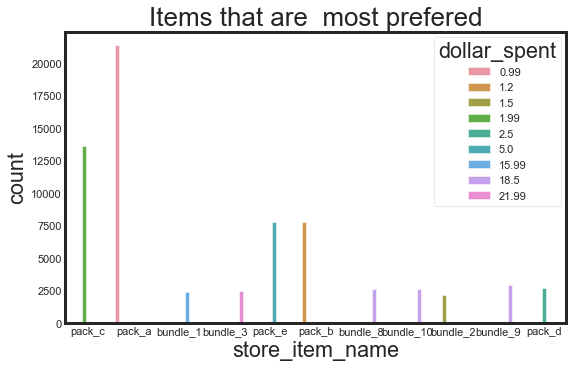

In [122]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper

fig.set_size_inches(8, 5)
ax = sns.countplot(x="store_item_name", hue="dollar_spent", data=play)
plt.title('Items that are  most prefered');

In [123]:
play.groupby('store_item_name')['dollar_spent'].sum().max()

54982.0

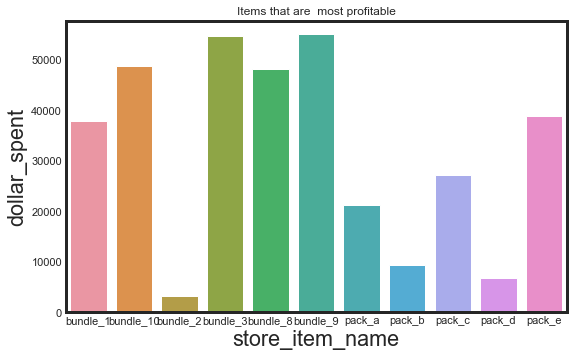

In [124]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
sns.set(style="whitegrid")
ax = sns.barplot(x="store_item_name", y="dollar_spent", data=dr)
plt.title('Items that are  most profitable');

From the plot above, it results that bundle_9 brings the highest revenue(most profitable), although the item most aquired is pack_a(most preferred), due to the fact that is the cheapest.

#### We now can look to see if the player's spending behaviour

In [125]:
import datetime as dt
NOW = dt.datetime(2015,12,12)

In [126]:
#Create a  tablewith the columns of interest and their transformations
data = play.groupby('client_id',as_index=False).agg({'Purchase': lambda x: (NOW - x.max()).days, # Recency
                                        'store_item_name': lambda x: x.count(),      # Pack
                                        'dollar_spent': lambda x: x.sum(),  # Monetary Value
                                         'experience_points': lambda x: x.sum()}) # Player level
                                         


data.rename(columns={'Purchase': 'recency', 
                         'store_item_name': 'Pack', 
                         'dollar_spent': 'monetary_value',
                         'experience_points':'Level'}, inplace=True)

In [127]:
data.head()

,client_id,recency,Pack,monetary_value,Level
0,p0016p4a0ap,2,10,185.00,4078.383183
1,p0044p434bp,9,20,197.45,8909.580270
2,p004dp4a20p,2,60,389.40,25476.006447
3,p00c9p11e7p,1,6,5.94,2217.575294
4,p00d8p46z6p,15,12,13.14,4145.356521


In [128]:
data.describe()

,recency,Pack,monetary_value,Level
count,1584.000000,1584.000000,1584.000000,1584.000000
mean,7.147727,43.247475,221.539426,17955.742506
std,6.581115,56.639181,355.872014,23459.427804
min,0.000000,1.000000,0.990000,310.664806
25%,2.000000,6.000000,20.490000,2364.595304
50%,5.000000,20.000000,70.835000,8198.477203
75%,11.000000,58.000000,260.190000,24094.563108
max,30.000000,376.000000,2635.500000,155660.645565


In [129]:
pl.head()

,Date,Platform,build_version,client_id,outcome,experience_points,store_item_name,Purchase,dollar_spent
0,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,pack_c,2015-12-02,1.99
1,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,pack_a,2015-12-08,0.99
2,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,pack_c,2015-11-19,1.99
3,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,bundle_1,2015-12-05,15.99
4,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,pack_a,2015-12-11,0.99


In [130]:
pl = pl.drop_duplicates(subset = ['client_id', 'Purchase'])

In [131]:
missing_pct = pl.isnull().sum() / len(pl)
to_drop = list((missing_pct[missing_pct > 0.9]).index)
to_drop = [x for x in to_drop if x != 'Purchase']
to_drop

[]

In [132]:
pl.drop(columns=to_drop, inplace=True)
pl.shape

(5910, 9)

In [133]:
one_unique = pl.apply(lambda x: x.nunique() == 1, axis=0)
to_drop = list(one_unique[one_unique == True].index)
to_drop

[]

In [134]:
threshold = 0.95

# Calculate correlations
corr_matrix = pl.corr().abs()

# Subset to the upper triangle of correlation matrix
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Identify names of columns with correlation above threshold
to_drop = [column for column in upper.columns if any(
    upper[column] >= threshold)]

In [135]:
print(
    f'There are {len(to_drop)} columns to drop with correlation > {threshold}')

There are 0 columns to drop with correlation > 0.95


In [136]:
pl = pd.get_dummies(pl.drop(columns=['Date', 'client_id', 'Purchase']))
pl.head()

,experience_points,dollar_spent,Platform_PC,Platform_PS4,build_version_1.0.1,build_version_1.0.2,outcome_lose,outcome_win,store_item_name_bundle_1,store_item_name_bundle_10,store_item_name_bundle_2,store_item_name_bundle_3,store_item_name_bundle_8,store_item_name_bundle_9,store_item_name_pack_a,store_item_name_pack_b,store_item_name_pack_c,store_item_name_pack_d,store_item_name_pack_e
0,295.636308,1.99,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1,295.636308,0.99,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
2,295.636308,1.99,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
3,295.636308,15.99,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0
4,295.636308,0.99,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0


In [158]:
pl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5910 entries, 0 to 79726
Data columns (total 19 columns):
experience_points            5910 non-null float64
dollar_spent                 5910 non-null float64
Platform_PC                  5910 non-null uint8
Platform_PS4                 5910 non-null uint8
build_version_1.0.1          5910 non-null uint8
build_version_1.0.2          5910 non-null uint8
outcome_lose                 5910 non-null uint8
outcome_win                  5910 non-null uint8
store_item_name_bundle_1     5910 non-null uint8
store_item_name_bundle_10    5910 non-null uint8
store_item_name_bundle_2     5910 non-null uint8
store_item_name_bundle_3     5910 non-null uint8
store_item_name_bundle_8     5910 non-null uint8
store_item_name_bundle_9     5910 non-null uint8
store_item_name_pack_a       5910 non-null uint8
store_item_name_pack_b       5910 non-null uint8
store_item_name_pack_c       5910 non-null uint8
store_item_name_pack_d       5910 non-null uint8
store_

In [137]:
pl[pl==np.inf]=np.nan
pl.fillna(pl.mean(), inplace=True)

In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(pl, pl['dollar_spent'], test_size=0.25, random_state=42)

In [144]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=42)
regressor.fit(X_train,Y_train)
score=regressor.score(X_test,Y_test)
print(score)

1.0


ValueError: num must be 1 <= num <= 6, not 7

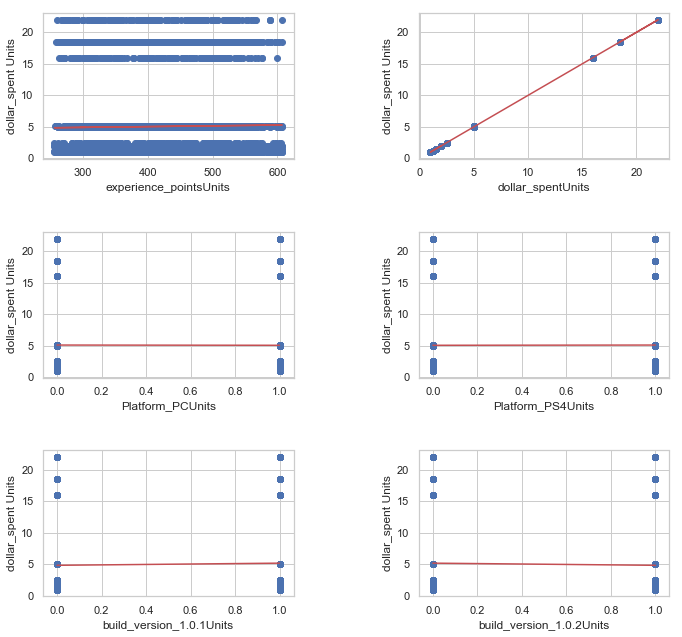

In [149]:
#plot all categ vs dollar spent

fig=plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.5)

for i,item in enumerate(pl):
    z=np.polyfit(pl[item], pl['dollar_spent'],1)
    p=np.poly1d(z)
    plt.subplot(3,2,i+1)
    plt.scatter(x=pl[item], y=pl['dollar_spent'])
    plt.plot(pl[item], p(pl[item]), "r-")
    plt.xlabel(item + 'Units'), plt.ylabel('dollar_spent Units')
plt.title(item + 'vs. Dollar spent')

In [145]:
from scipy.stats import pearsonr
for category in pl:
    correlation_coef=pearsonr(pl[category], pl['dollar_spent'])[0]
    print("dollar_spent and "+category+" R^2 value={:.4f}".format(np.square(correlation_coef)))

dollar_spent and experience_points R^2 value=0.0003
dollar_spent and dollar_spent R^2 value=1.0000
dollar_spent and Platform_PC R^2 value=0.0000
dollar_spent and Platform_PS4 R^2 value=0.0000
dollar_spent and build_version_1.0.1 R^2 value=0.0006
dollar_spent and build_version_1.0.2 R^2 value=0.0006
dollar_spent and outcome_lose R^2 value=0.0002
dollar_spent and outcome_win R^2 value=0.0002
dollar_spent and store_item_name_bundle_1 R^2 value=0.0911
dollar_spent and store_item_name_bundle_10 R^2 value=0.1600
dollar_spent and store_item_name_bundle_2 R^2 value=0.0085
dollar_spent and store_item_name_bundle_3 R^2 value=0.2250
dollar_spent and store_item_name_bundle_8 R^2 value=0.1505
dollar_spent and store_item_name_bundle_9 R^2 value=0.1905
dollar_spent and store_item_name_pack_a R^2 value=0.1731
dollar_spent and store_item_name_pack_b R^2 value=0.0395
dollar_spent and store_item_name_pack_c R^2 value=0.0490
dollar_spent and store_item_name_pack_d R^2 value=0.0061
dollar_spent and store_i

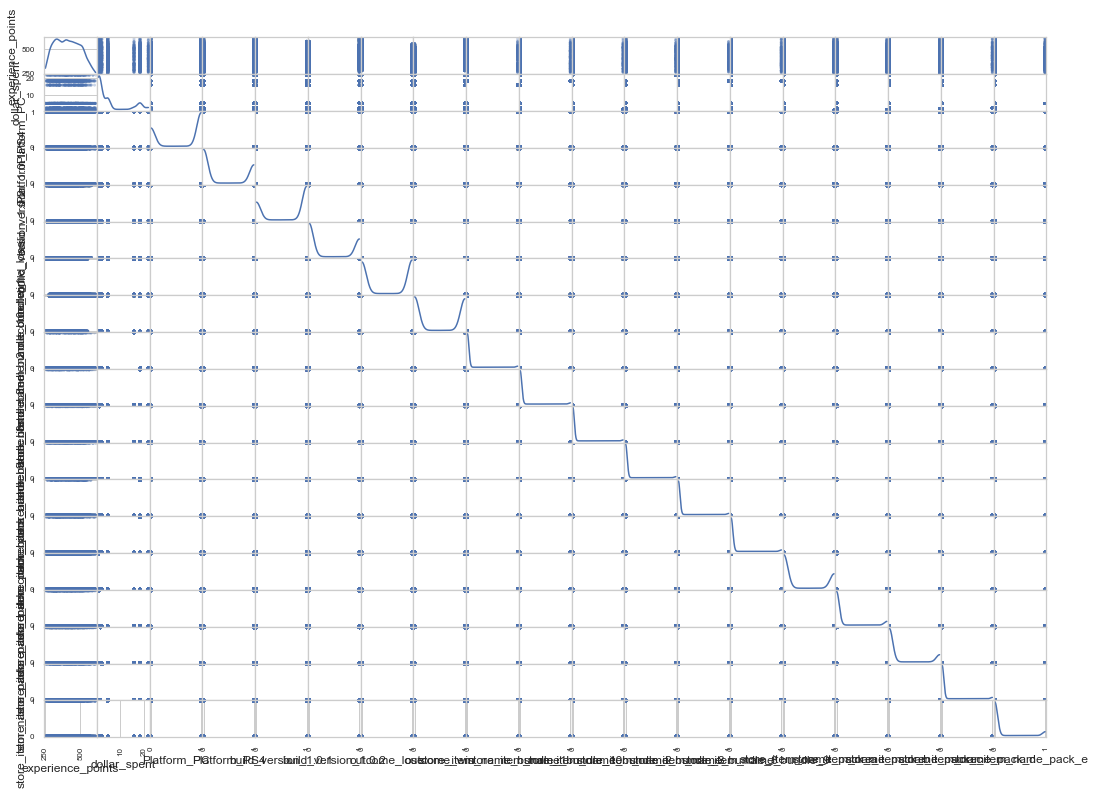

In [152]:
pd.plotting.scatter_matrix(pl, alpha=0.3, figsize=(16,12), diagonal='kde');

The Pearson correlation coefficients show that the amount of money spent by players is correlated to some of the bundle products and one of the pack product, and very less correlated with the eperience points

#### Dimensionality reduction

In [235]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2).fit(pl)

In [236]:
pca_results=vs.pca_results(pl,pca)

NameError: name 'vs' is not defined

ValueError: x and y must have same first dimension, but have shapes (1,) and (2,)

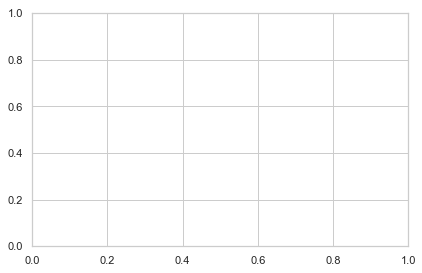

In [244]:
num_components=np.arange(1,1)
cumulative_variance_explained=np.cumsum(pca.explained_variance_ratio_)
plt.plot(2, cumulative_variance_explained,'-o');
plt.xlabel('Number of PCs'); plt.ylabel('Cumulative Explained Variance');
plt.title('Cumulative Explained Variance vs. Number of PCs')

In [207]:
pca=PCA(n_components=2).fit(pl)
reduced_data=pca.transform(pl)

In [209]:
display(pd.DataFrame(np.round(reduced_data,4), columns=['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-117.5676,-2.9314
1,-117.5689,-3.9472
2,-117.5676,-2.9314
3,-117.5504,11.0770
4,-117.5689,-3.9472
5,-117.5689,-3.9472
6,97.5354,-0.1088
7,-79.8939,0.1086
8,129.6375,-0.1485
9,-31.5188,0.0489


#### Clustering

Clusters: 2; Silhouette Score= 0.5896
Clusters: 3; Silhouette Score= -0.2386
Clusters: 4; Silhouette Score= 0.5149
Clusters: 5; Silhouette Score= 0.2215
Clusters: 6; Silhouette Score= -0.2538
Clusters: 7; Silhouette Score= -0.2965
Clusters: 8; Silhouette Score= -0.3225
Clusters: 9; Silhouette Score= -0.4122
Clusters: 10; Silhouette Score= -0.2866


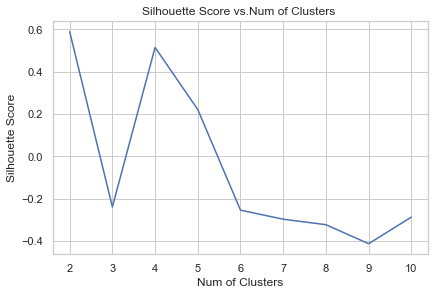

In [215]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

scores=[]
for i in range(2,11):
    n_clusters=i
    clusterer=GaussianMixture(n_components=n_clusters, random_state=42).fit(reduced_data)
    preds=clusterer.predict(reduced_data)
    centers=clusterer.means_
    score=silhouette_score(reduced_data, preds)
    scores.append(score)
    print('Clusters: {}; Silhouette Score= {:.4f}'.format(n_clusters,score))
plt.plot(np.arange(2,11), scores)
plt.xlabel('Num of Clusters'); plt.ylabel('Silhouette Score');
plt.title('Silhouette Score vs.Num of Clusters ');

After calculating the silhouette scores for different number if clusters, the best number of clusters was 2.

#### Creating Clusters

In [216]:
clusterer=GaussianMixture(n_components=2, random_state=42)
clusterer.fit(reduced_data)
preds= clusterer.predict(reduced_data)
centers=clusterer.means_

#### Data Recovery

In [218]:
log_centers=pca.inverse_transform(centers)
true_centers=np.exp(log_centers)

segments=['Segments{}'.format(i) for i in range (0, len(centers)) ]
true_centers=pd.DataFrame(np.round(true_centers), columns=pl.keys())
true_centers.index=segments
print("Centers of clusters:")
display(true_centers)

Centers of clusters:


,experience_points,dollar_spent,Platform_PC,Platform_PS4,build_version_1.0.1,build_version_1.0.2,outcome_lose,outcome_win,store_item_name_bundle_1,store_item_name_bundle_10,store_item_name_bundle_2,store_item_name_bundle_3,store_item_name_bundle_8,store_item_name_bundle_9,store_item_name_pack_a,store_item_name_pack_b,store_item_name_pack_c,store_item_name_pack_d,store_item_name_pack_e
Segments0,4.327894e+209,255.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Segments1,1.262630e+150,99.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


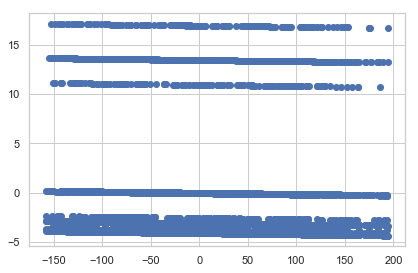

In [226]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.show()

The clusters look like are mainly split based on experience points and most representative bundle and pack item.
As I previously segmented the customers based on quantiles, it seems that clustering is not very representative/practical for this data set.